<h1>Topic- Predicting CO₂ Emissions from Vehicle Specifications</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./Data/CO2 Emissions_Canada.csv')
print("file read successfully")

file read successfully


In [3]:
df.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

### Dataset Overview
- **Total rows:** 7,385  
- **Total columns:** 12  
- **Memory usage:** ~692.5 KB  
- **No missing values** in any column.

---

### Columns Description

1. **Make** *(object)* – Car manufacturer (e.g., Toyota, BMW).  
2. **Model** *(object)* – Specific model name of the vehicle.  
3. **Vehicle Class** *(object)* – Category/type of the vehicle (e.g., SUV, sedan).  
4. **Engine Size (L)** *(float64)* – Engine displacement in liters.  
5. **Cylinders** *(int64)* – Number of engine cylinders.  
6. **Transmission** *(object)* – Gearbox type and details (e.g., A6 = 6-speed automatic).  
7. **Fuel Type** *(object)* – Fuel code:  
   - **Z** = Regular gasoline  
   - **D** = Diesel  
   - **X** = Premium gasoline  
   - **E** = Ethanol (E85)  
   - **N** = Natural gas  
8. **Fuel Consumption City (L/100 km)** *(float64)* – Fuel usage in city driving.  
9. **Fuel Consumption Hwy (L/100 km)** *(float64)* – Fuel usage in highway driving.  
10. **Fuel Consumption Comb (L/100 km)** *(float64)* – Combined fuel usage.  
11. **Fuel Consumption Comb (mpg)** *(int64)* – Combined fuel efficiency in miles per gallon.  
12. **CO₂ Emissions (g/km)** *(int64)* – CO₂ emitted per kilometer.

---

### Key Points
- **5 categorical columns:** Make, Model, Vehicle Class, Transmission, Fuel Type  
- **4 continuous numeric columns:** Engine Size, City/Highway/Combined fuel consumption (L/100 km)  
- **3 integer numeric columns:** Cylinders, Combined fuel consumption (mpg), CO₂ emissions  



In [5]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


### Numeric Column Statistics

| Column                                | Mean   | Std Dev | Min  | Max  |
|---------------------------------------|--------|---------|------|------|
| Engine Size (L)                       | ~3.35  | ~1.36   | 1.0  | 8.4  |
| Cylinders                             | ~6.01  | ~1.94   | 3    | 16   |
| Fuel Consumption City (L/100 km)      | ~13.74 | ~4.68   | 4.6  | 30.2 |
| Fuel Consumption Hwy (L/100 km)       | ~9.57  | ~3.12   | 3.5  | 20.8 |
| Fuel Consumption Comb (L/100 km)      | ~11.85 | ~3.75   | 4.1  | 26.1 |
| Fuel Consumption Comb (mpg)           | ~24.9  | ~8.12   | 9    | 60   |
| CO₂ Emissions (g/km)                  | ~279.4 | ~88.0   | 108  | 617  |

---

### Column Types
- **Categorical:** Make, Model, Vehicle Class, Transmission, Fuel Type
- **Numeric (Continuous):** Engine Size (L), Fuel Consumption City, Hwy, Comb (L/100 km)
- **Numeric (Discrete):** Cylinders, Fuel Consumption Comb (mpg), CO₂ Emissions

Checking Null values

In [6]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

So there are no null values

#### Checking unique values

In [7]:
print(df['Model'].nunique())
print(df['Make'].nunique())
print(df['Vehicle Class'].nunique())
print(df['Engine Size(L)'].nunique())
print(df['Cylinders'].nunique())
print(df['Transmission'].nunique())
print(df['Fuel Type'].nunique())



2053
42
16
51
8
27
5


In [8]:
print("fuel\n", df['Fuel Type'].unique())

fuel
 ['Z' 'D' 'X' 'E' 'N']


In [9]:

print("Cylinders\n", df['Cylinders'].unique())

Cylinders
 [ 4  6 12  8 10  3  5 16]


- **Vehicle Model** → **2053** unique values  
- **Vehicle Class** → **16** unique values
- **Vehicle Company** → **42** unique values 
- **Vehicle Engine Size (L)** → **51** unique values  
- **Vehicle Cylinders** → **8** unique values  
  - Possible values: **[4, 6, 12, 8, 10, 3, 5, 16]**  
- **Vehicle Transmission** → **27** unique values  
- **Vehicle Fuel Type** → **5** unique values  
  - Possible values: **['Z', 'D', 'X', 'E', 'N']**


# Now Checking Co2 Distribution by Fuel Type

C:\Users\DELL\AppData\Local\Temp\ipykernel_20716\3537130754.py:24: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  plt.tight_layout()
C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


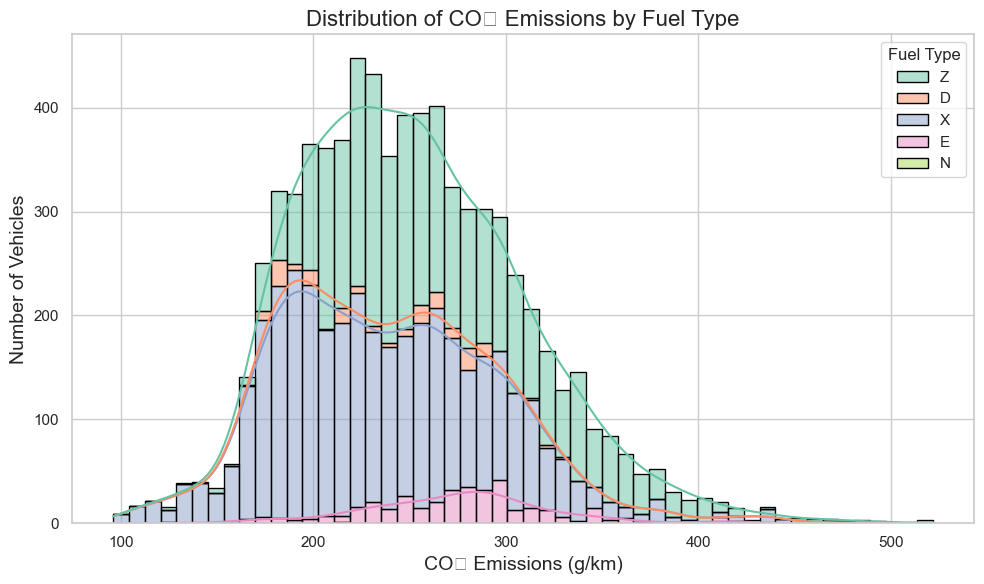

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Plot histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x="CO2 Emissions(g/km)",
    hue="Fuel Type",       # color by fuel type
    multiple="stack",      # stack bars by category
    kde=True,              # show KDE curve
    palette="Set2",        # color palette
    edgecolor="black"
)

# Labels and title
plt.title("Distribution of CO₂ Emissions by Fuel Type", fontsize=16)
plt.xlabel("CO₂ Emissions (g/km)", fontsize=14)
plt.ylabel("Number of Vehicles", fontsize=14)

plt.tight_layout()
plt.show()


Distribution Shape

    Most vehicles emit between 175–300 g/km.

    Peaks occur between 200–250 g/km for certain fuel types.

    Electric or low-emission categories likely appear on the lower end, but here every category seems to start above ~100 g/km (possibly due to the dataset).

Fuel Type Comparisons

    Z fuel type is the most common and has a wide spread but a peak around ~225 g/km.

    X fuel type has a similar peak but slightly lower frequency.

    E has relatively fewer vehicles and generally lower CO₂ emissions.

    D and N are less frequent but still appear in similar ranges.

Overall Pattern

    Emission distribution is slightly right-skewed — fewer vehicles have extremely high emissions (>350 g/km).

    Some overlap exists between fuel types, meaning different fuels can still produce similar emissions.

## Vehicle Count by fuel Type

In [11]:
# Count vehicles for each fuel type
fuel_counts = df['Fuel Type'].value_counts()

# Print counts
print("Vehicle Count by Fuel Type:")
print(fuel_counts)


Vehicle Count by Fuel Type:
Fuel Type
X    3637
Z    3202
E     370
D     175
N       1
Name: count, dtype: int64


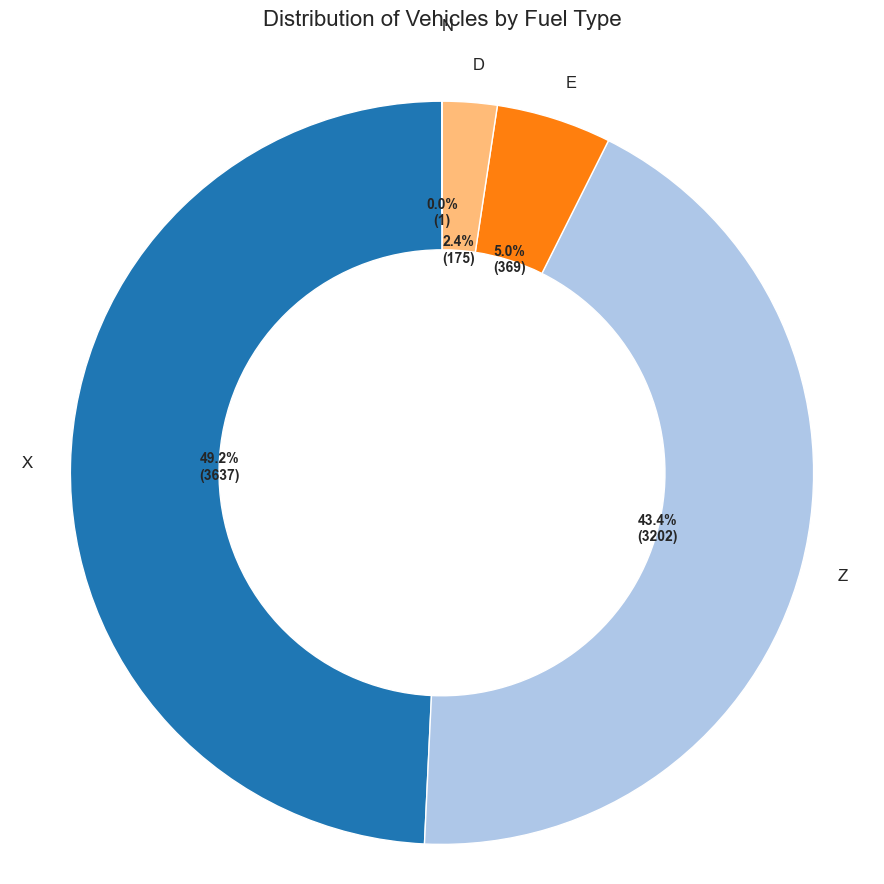

In [12]:
# Example: Count vehicles for each fuel type
fuel_counts = df['Fuel Type'].value_counts()

# Create explode list to highlight small categories (<2%)
explode = [0.1 if (count / fuel_counts.sum()) < 0.02 else 0 
           for count in fuel_counts]

# Plot donut-style pie chart
plt.figure(figsize=(9, 9))
wedges, texts, autotexts = plt.pie(
    fuel_counts,
    labels=fuel_counts.index,
    autopct=lambda p: f'{p:.1f}%\n({int(p*fuel_counts.sum()/100)})',  # % + count
    startangle=90,
    explode=explode,
    colors=plt.cm.tab20.colors,
    wedgeprops=dict(width=0.4, edgecolor='w')  # donut style
)

# Improve label font size
plt.setp(texts, size=12)
plt.setp(autotexts, size=10, weight="bold")

# Title
plt.title('Distribution of Vehicles by Fuel Type', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

Z - Regular Gasoline - 43.4%
x- Premium Gasoline - 49.2 %

In [13]:
# Group by fuel type and get average & max CO₂ emissions
co2_stats = df.groupby('Fuel Type')['CO2 Emissions(g/km)'].agg(['mean']).reset_index()

# Rename columns for clarity
co2_stats.columns = ['Fuel Type', 'Average CO₂ (g/km)']

# Print results
print(co2_stats)


  Fuel Type  Average CO₂ (g/km)
0         D          237.548571
1         E          275.091892
2         N          213.000000
3         X          235.119329
4         Z          266.043410


### Not so much difference by fule type co2 Emmision

# Now Check Vehicle Company Distribution and their emision

In [14]:
df['Make'].value_counts().sort_values(ascending = False)

Make
FORD             628
CHEVROLET        588
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: count, dtype: int64

### Top 7 Company Brands

| Rank | Brand         | Vehicle Count |
|------|--------------|---------------|
| 1    | FORD         | 628           |
| 2    | CHEVROLET    | 588           |
| 3    | BMW          | 527           |
| 4    | MERCEDES-BENZ| 419           |
| 5    | PORSCHE      | 376           |
| 6    | TOYOTA       | 330           |
| 7    | GMC          | 328           |


C:\Users\DELL\AppData\Local\Temp\ipykernel_20716\1030725245.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


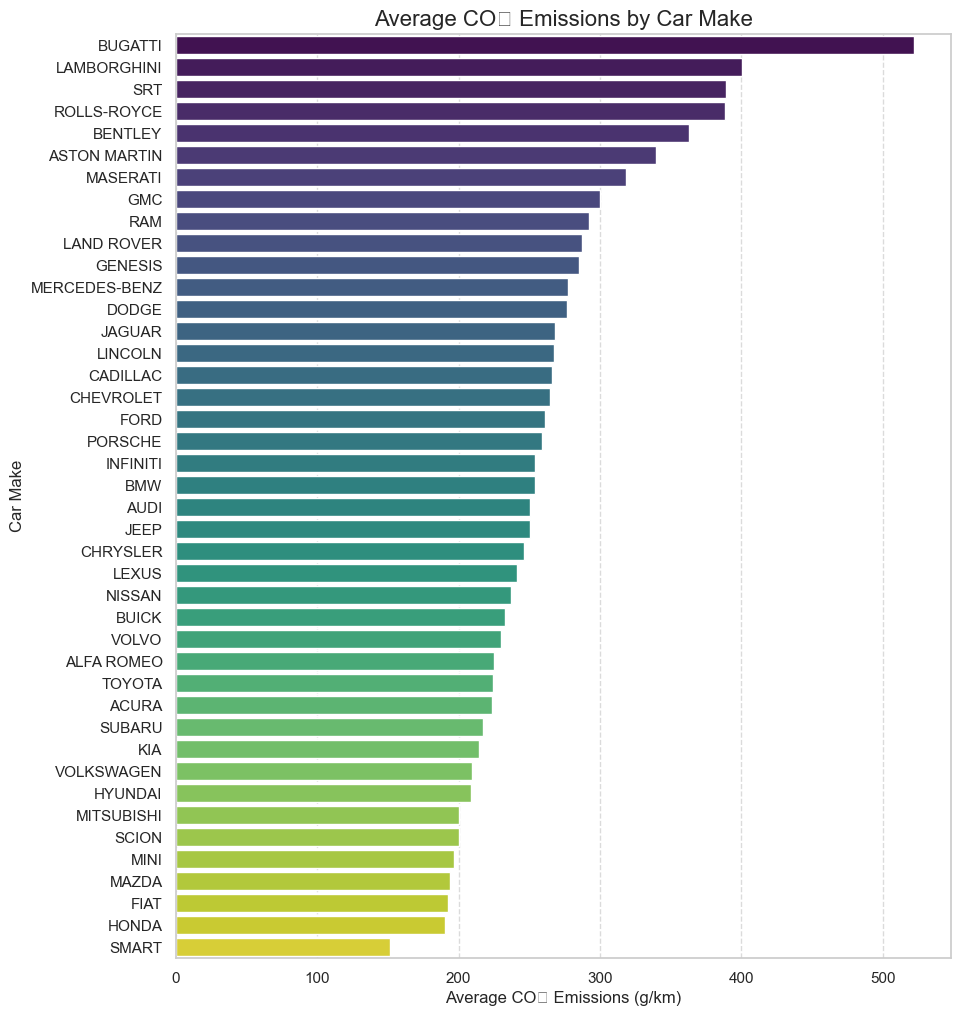

In [15]:
# Calculate average CO₂ emissions per make
make_co2 = df.groupby('Make')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False)

# Plot horizontal histogram (bar plot)
plt.figure(figsize=(10, 12))
sns.barplot(
    x=make_co2.values,
    y=make_co2.index,
    palette="viridis"
)
plt.title('Average CO₂ Emissions by Car Make', fontsize=16)
plt.xlabel('Average CO₂ Emissions (g/km)')
plt.ylabel('Car Make')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### 📌 Key Takeaways from CO₂ Emission Analysis

- **Top Emitters:** Bugatti, Lamborghini, and SRT lead in average CO₂ emissions due to their high-performance, large-engine sports cars.  
- **Luxury Dominance:** Rolls-Royce, Bentley, Aston Martin, and Maserati also rank high, prioritizing performance over efficiency.  
- **Mid-Range:** Brands like Ford, Porsche, BMW, and Chevrolet show mixed performance–efficiency profiles.  
- **Lowest Emitters:** Honda and Smart stand out as the most eco-friendly, producing smaller, fuel-efficient vehicles.  
- **Overall Trend:** High-performance and luxury brands emit significantly more CO₂, while mass-market economy cars are far cleaner.


## Engine Size vs CO₂ Emissions by Fuel Type

C:\Users\DELL\AppData\Local\Temp\ipykernel_20716\516061962.py:16: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  plt.tight_layout()
C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


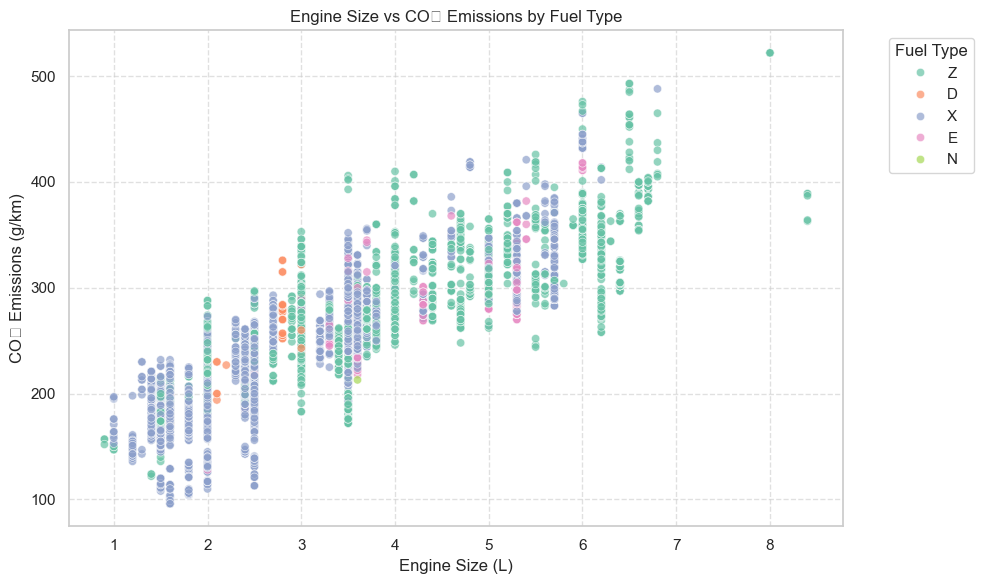

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='Engine Size(L)', 
    y='CO2 Emissions(g/km)', 
    hue='Fuel Type', 
    alpha=0.7, 
    palette='Set2'
)

plt.title('Engine Size vs CO₂ Emissions by Fuel Type')
plt.xlabel('Engine Size (L)')
plt.ylabel('CO₂ Emissions (g/km)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




- **Clear positive trend**: Bigger engines emit more CO₂.
- **Small engines (1–2 L):**
  Mostly under 200 g/km — compact, fuel-efficient cars.
- **Medium engines (2–4 L):**
  Emissions range around 200–350 g/km — typical sedans and SUVs.
- **Large engines (5 L+):**
  Usually above 350–500+ g/km — heavy or high-performance vehicles.
- **Fuel type matters:**
  Even at the same engine size, CO₂ emissions vary a lot depending on fuel type.
- **Outliers:**
  - Very large engine (~8 L) shows ~550 g/km — likely a sports car.
  - A few very low-emission points (under 100 g/km) with small engines — possible hybrids or electric vehicles.

 **Conclusion:** CO₂ emissions increase with engine size overall, but fuel type plays a major role in emission differences even among vehicles with similar engine capacities.


## Cylinder Size vs C02 emmision

C:\Users\DELL\AppData\Local\Temp\ipykernel_20716\1178923752.py:16: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  plt.tight_layout()
C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


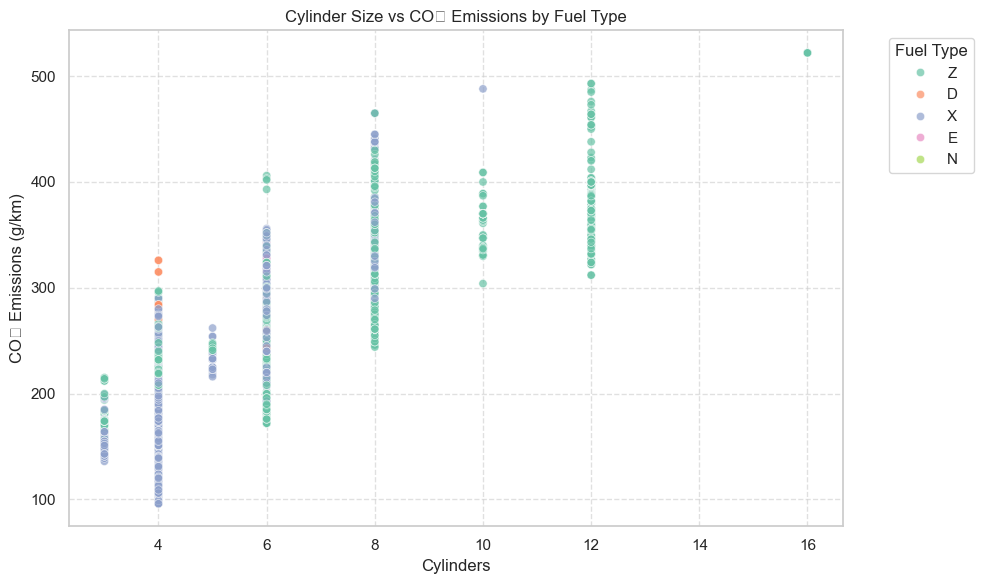

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='Cylinders', 
    y='CO2 Emissions(g/km)', 
    hue='Fuel Type', 
    alpha=0.7, 
    palette='Set2'
)

plt.title('Cylinder Size vs CO₂ Emissions by Fuel Type')
plt.xlabel('Cylinders')
plt.ylabel('CO₂ Emissions (g/km)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### CO₂ emissions generally increase with the number of cylinders, but fuel type still influences emissions at each cylinder level. Higher cylinder engines are less fuel-efficient and more polluting.

# now, check heatmap for dependency

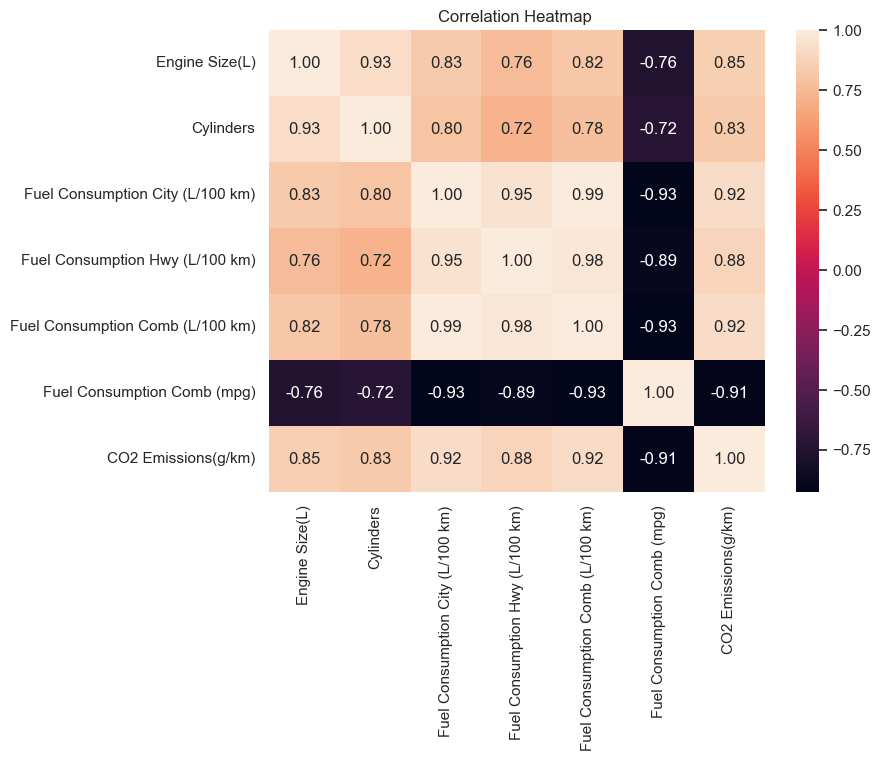

In [24]:
corr_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = corr_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Heatmap ')
plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

<h3>Larger engines and higher fuel consumption values are highly associated with higher CO₂ emissions. </h3>
<h3>Fuel Consumption Comb (mpg) has a strong negative correlation with CO₂ Emissions ( -0.91 )</h3>
Higher MPG = better fuel efficiency → lower emissions

# Prediction Using Linear Regression

In [26]:
 from  sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split # for data Validation
from sklearn.metrics import r2_score # for the evaluation -> to predict model accuracy

In [33]:
x=df[['Engine Size(L)','Cylinders','Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)']]
y= df['CO2 Emissions(g/km)']

In [34]:
x_train , x_test, y_train, y_test = train_test_split( x, y , test_size= 0.2, random_state=47)

In [35]:
model = LinearRegression() 
model.fit( x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [36]:
y_pred=model.predict(x_test)
r2 = r2_score(y_pred, y_test)
print("r2_score is = " , r2)

r2_score is =  0.8912420557658876


In [40]:
engine_size = float(input("Enter Engine Size (L): "))
cylinders = int(input("Enter number of Cylinders: "))
fuel_consumption_l = float(input("Enter Fuel Consumption Comb (L/100 km): "))
fuel_consumption_mpg = int(input("Enter Fuel Consumption Comb (mpg): "))

input_data = pd.DataFrame({
    'Engine Size(L)': [engine_size],
    'Cylinders': [cylinders],
    'Fuel Consumption Comb (L/100 km)': [fuel_consumption_l],
    'Fuel Consumption Comb (mpg)': [fuel_consumption_mpg]
})


Enter Engine Size (L):  2
Enter number of Cylinders:  4
Enter Fuel Consumption Comb (L/100 km):  8.5
Enter Fuel Consumption Comb (mpg):  33


In [42]:
# Predict using the model
prediction = model.predict(input_data)
# print(prediction)
print("Predicted CO₂ Emission (g/km):", round(prediction[0], 2))


[201.71086429]
Predicted CO₂ Emission (g/km): 201.71
